<a href="https://colab.research.google.com/github/seon0415/weit/blob/main/%5B%EC%B4%88%EB%B3%B4%EC%9E%90_%ED%95%84%EB%8F%85%5D_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%B0%A9%EB%B2%95%EB%93%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/데이콘/3주차/"
!unzip "타이타닉.zip"

/content/drive/MyDrive/Colab Notebooks/데이콘/3주차
Archive:  타이타닉.zip
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission.csv          
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


먼지 데이터를 불러옵니다.

In [ ]:
# 현재 작업 경로를 얻는 함수
import os
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/데이콘/3주차


데이크루 3주차에 올리고 싶었는데 에러가 떠서 4주차에 올려봅니당 !! :)

In [ ]:
# 데이터 불러오기
import pandas as pd

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submission = pd.read_csv("./submission.csv")

In [ ]:
# shape 확인하기
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

train과 test의 column은 다음과 같습니다.
- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)


이 중 필요한 column만 이용하여 결과를 구해보고자 합니다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- columns 수가 많으니 이 중 몇 개를 추려보고 싶어서 상관 관계 분석을 먼저 해보기로 합니다.

- 상관분석(Correlation Analysis)은 두 변수간에 어떤 선형적인 관계를 가지고 있는지를 분석하는 방법입니다. 이때 두 변수간의 관계의 강도를 상관관계(Correlation coefficient)라고 합니다.

- 상관계수는 두 변수간의 연관된 정도만 나타낼 뿐 원인 결과를 나타내는 인과관계를 설명하는 것은 아님을 반드시 알아야합니다.


- 상관관계 분석에서는 기본적 방법으로 피어슨 상관계수를 많이 이용합니다.

In [ ]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
train['Sex'] = train['Sex'].replace('male',0)
test['Sex'] = test['Sex'].replace('male',0)

In [ ]:
train['Sex'] = train['Sex'].replace('female',1)
test['Sex'] = test['Sex'].replace('female',1)

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age는 없는 컬럼을 삭제해줍니다.
- Cabin은 독립 변수로 안 쓸 거라서 별다른 전처리를 하지 않을 것입니다.
- Embarked는 S,C,Q를 범주형으로 변환하려고 합니다
- 이때 Enbarked열에 존재하는 2가지 null값을 매꾸어주기 위해 null값을 제거한 후 상관관계 분석을 통해 기준 열을 이용하여 매꾸어주겠습니다.

In [ ]:
train2 = train.dropna(subset=['Embarked'])

In [ ]:
print(train2.shape)

(889, 12)


In [ ]:
train2.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
import copy
train2 = train2.copy()
train2.loc[train2['Embarked'] == 'C','Embarked']=0
train2.loc[train2['Embarked'] == 'Q','Embarked']=1
train2.loc[train2['Embarked'] == 'S','Embarked']=2

In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [ ]:
train2['Embarked'] = train2['Embarked'].astype(int)

In [ ]:
# 특정 컬럼과 나머지 컬럼간의 상관계수 계산
train2.corrwith(train2['Embarked'])

PassengerId    0.013166
Survived      -0.169718
Pclass         0.164681
Sex           -0.110320
Age           -0.032565
SibSp          0.068900
Parch          0.040449
Fare          -0.226311
Embarked       1.000000
dtype: float64

- 당연한 결과겠지만 Fare와 가장 연관성이 뛰어납니다. 따라서 Fare를 살펴보고 Embarked를 채워보겠습니다.

In [ ]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
train[train['Fare'] == 80.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
train[train['Pclass']==1]['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [ ]:
train[train['Survived']==1]['Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- 엌ㅋㅋㅋ s가 확실이 많으니 대세를 따라서 S로 채우기로 했습니다.

In [ ]:
train['Embarked'] = train['Embarked'].fillna("S")

In [ ]:
train.isnull().sum() # 굳

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
train.loc[train.Embarked == 'C','Embarked']=0
train.loc[train.Embarked == 'Q','Embarked']=1
train.loc[train.Embarked == 'S','Embarked']=2

In [ ]:
train['Embarked'] = train['Embarked'].astype('int64')

In [ ]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.162098
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.108262
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.030394
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,-0.108262,-0.030394,0.068230,0.039798,-0.224719,1.000000


- 테스트 값도 null값을 매꾸어주겠습니다,

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


- Fare열과 Pcalss열의 상관관계가 높으므로 Pclass가 3인 행들의 Fare열의 분포를 살펴보겠습니다.

In [ ]:
fare = pd.DataFrame(test[test['Pclass']==3]['Fare'].value_counts().nlargest(12))
fare = fare.reset_index()
fare

,index,Fare
0,7.7500,21
1,8.0500,17
2,7.8958,11
3,7.7750,10
4,7.2292,9
5,7.2250,9
6,8.6625,8
7,7.8542,8
8,7.8792,6
9,7.2500,5


- nlargest()<br>
가장 많은 비중을 차지하고 있는 장르를 추출하겠다는 의미입니다.

In [ ]:
# 오잉 index의 평균이어서 그렇습니다.
fare['index'].mean()

8.395141666666667

In [ ]:
test['Fare'] = test['Fare'].fillna("7.753825")

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

- 조건에 맞은 Fare 값들이 특출난 값이 없기 때문에 평균값을 채워 넣어줍니다.

#### 정규화와 표준화

정규화와 표준화를 잘 보고 다르게 선택해서 하면 좋을 것 같습니다.

- 정규화 : -1 ~ 1 사이의 값으로 변환
- 표준화 : 평균이 0이고 표준편차가 1인 값으로 변환

정규화와 표준화 식은 다음과 같이 정의할 수 있습니다.

In [ ]:
def normalize(x):
  return (x-x.min())/(x.max()-x.min())

In [ ]:
def standardscaler(x):
  return (x-x.mean())/x.std()

- 정규화와 표준화 같은 경우 패키지로도 잘 나와있기 때문에 위처럼 정의를 해도 되고, 패키지를 써도 됩니다. 따라서 패키지를 이용하여 바꾸어주겠습니다.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train[['Fare']])
train_fare = ss.transform(train[['Fare']])
test_fare = ss.transform(test[['Fare']])

In [ ]:
train['Fare2'] = train_fare
test['Fare2'] = test_fare

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,-0.488854


#### 이렇게 하여 완성된 열 중에서 필요한 열만 독립 변수로 가져옵니다.

In [ ]:
data = train[['Pclass','Sex','SibSp','Parch','Embarked','Fare2','Survived']]

- 여기서부터 이제 모델링을 하시면 됩니다.<br>
독립 변수 : 'Pclass','Sex','SibSp','Parch','Embarked','Fare2'<br>
종속 변수 : 'Survived'<br>

- 이 후 모델링 비교를 하시면 됩니다 :)

### 번외) Age를 독립변수를 쓰지 않은 이유


=> 편차가 너무 크고 null값이 너무 많았습니다.

In [ ]:
train['Age'].value_counts(ascending=True)

0.42      1
23.50     1
66.00     1
70.50     1
55.50     1
         ..
30.00    25
19.00    25
18.00    26
22.00    27
24.00    30
Name: Age, Length: 88, dtype: int64

In [ ]:
train['Age'].min()

0.42

In [ ]:
train['Age'].max()

80.0

- 나이를 구간별로 바꾸려고 min과 max를 확인해보니 0살도 있고 80살도 있습니다.
- 아래는 나이 값들을 시각화해본 모습입니다.

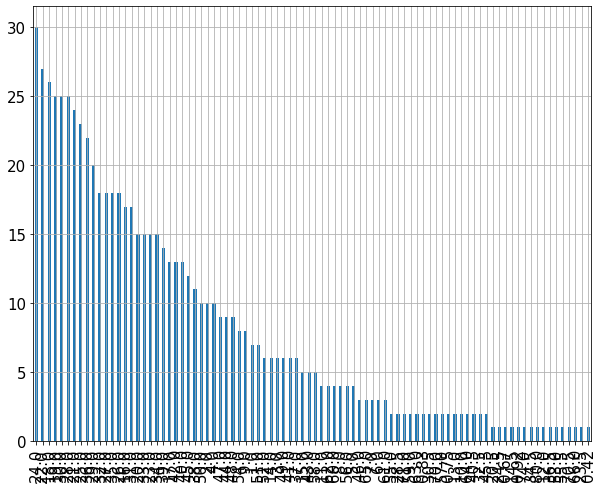

In [ ]:
CountStatus = pd.value_counts(train['Age'].values, sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정

In [ ]:
train['Age'].values[:10]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

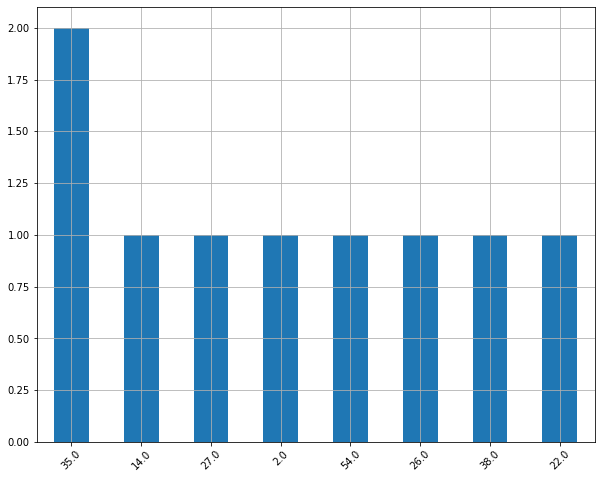

In [ ]:
import matplotlib.pyplot as plt
CountStatus = pd.value_counts(train['Age'].values[:10], sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=10)
plt.xticks(rotation=45)

In [ ]:
train['Age'].isnull().sum()

177

### [마무리]

- 자주 쓰이는 전처리 기법들을 이용하여 타이타닉 데이터를 예쁘게 만들었습니다.

- 초보자 분들은 요 데이터를 바탕으로 모델링을 해보면 좋을 것 같습니다 :)


### 감사합니다.

### [Reference]

피어슨 상관계수
https://gomguard.tistory.com/173

정규화와 표준화
https://bskyvision.com/849